In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from function import interpolate_range, Bondfilter, vectorized_premium

IV_Data = pd.read_csv('./../../../Data/Organized/all/NearbyMonthIV.csv', encoding='Big5', index_col=False)
IV_matrix = np.array(IV_Data)

#以收盤價為基礎
column_names_closing  = ['期貨收盤價', '履約價', '買賣權', '收盤價', '無風險利率', '到期天數', '隱含波動率(收盤價)']
column_index_closing = [IV_Data.columns.get_loc(col) for col in column_names_closing]
#nan_m = IV_matrix[np.isnan(IV)]
IV_matrix[:, column_index_closing[0]] = IV_matrix[:, column_index_closing[0]].astype(float)


F0 = np.array(IV_matrix[:, column_index_closing[0]])
K = np.array(IV_matrix[:, column_index_closing[1]])
c_p = np.array(IV_matrix[:, column_index_closing[2]])
price = np.array(IV_matrix[:, column_index_closing[3]])
r = np.array(IV_matrix[:, column_index_closing[4]])
T = np.array(IV_matrix[:, column_index_closing[5]]) / 365
IV_m = np.array(IV_matrix[:, column_index_closing[6]])

Ep = vectorized_premium(c_p, F0, K, r, IV_m, T)
error_m = abs(Ep - price)

IV_matrix_closing = IV_matrix[error_m <= 1e-6 ]
IV_call_closing = IV_matrix_closing[IV_matrix_closing[:,column_index_closing[2]] == 'call']
dates_closing = np.unique(IV_call_closing[:,0])

#以結算價為基礎
column_names_settlement  = ['期貨結算價', '履約價', '買賣權', '結算價', '無風險利率', '到期天數', '隱含波動率(結算價)']
column_index_settlement = [IV_Data.columns.get_loc(col) for col in column_names_settlement]
#nan_m = IV_matrix[np.isnan(IV)]
F0 = np.array(IV_matrix[:, column_index_settlement[0]])
K = np.array(IV_matrix[:, column_index_settlement[1]])
c_p = np.array(IV_matrix[:, column_index_settlement[2]])
price = np.array(IV_matrix[:, column_index_settlement[3]])
r = np.array(IV_matrix[:, column_index_settlement[4]])
T = np.array(IV_matrix[:, column_index_settlement[5]]) / 365
IV_m = np.array(IV_matrix[:, column_index_settlement[6]])

Ep = vectorized_premium(c_p, F0, K, r, IV_m, T)
error_m = abs(Ep - price)

IV_matrix_settlement = IV_matrix[error_m <= 1e-6 ]
IV_call_settlement = IV_matrix_settlement[IV_matrix_settlement[:,column_index_settlement[2]] == 'call']
dates_settlement = np.unique(IV_call_settlement[:,0])


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2900\1755530604.py:24: RuntimeWarning: invalid value encountered in less_equal
  IV_matrix_closing = IV_matrix[error_m <= 1e-6 ]
C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2900\1755530604.py:43: RuntimeWarning: invalid value encountered in less_equal
  IV_matrix_settlement = IV_matrix[error_m <= 1e-6 ]


In [2]:
if np.all(dates_closing==dates_settlement):
    dates = dates_closing


In [3]:
column_names_Futures = ['交易日期', '到期日期', '期貨開盤價', '期貨最高價', '期貨最低價', '期貨收盤價',\
                        '期貨結算價', '到期天數', '無風險利率']
column_index_Futures = [IV_Data.columns.get_loc(col) for col in column_names_Futures]
indices = [np.where(date == IV_call_closing)[0][0] for date in dates]
Udata = IV_call_closing[indices, :]
Udata = Udata[:, column_index_Futures]


13


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2900\700546403.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


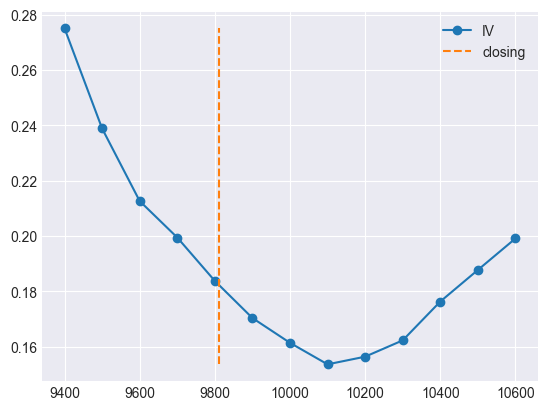

13


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2900\700546403.py:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


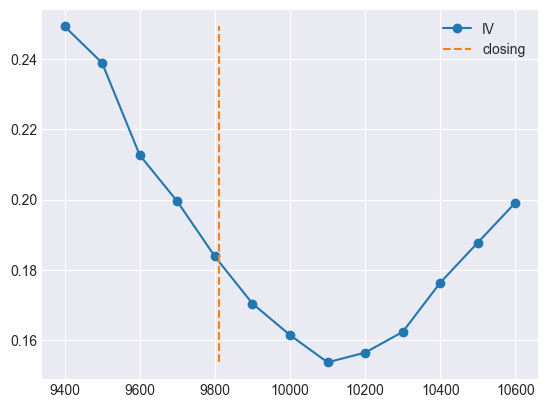

In [81]:
i = np.random.choice(range(len(dates)), 1)[0]
upper_range = 800
lower_range = 800
IV_K_day_closing = IV_call_closing[IV_call_closing[:,0] == dates[i]]
day_closing = Udata[i, 5]
K_upperbond = day_closing + upper_range 
K_lowerbond = day_closing - lower_range
IV_K_day_K, condition = Bondfilter(IV_K_day_closing[:,column_index_closing[1]], K_lowerbond, K_upperbond)
IV_K_day_closing_new = IV_K_day_closing[condition]
day_IV_closing = IV_K_day_closing_new[:, column_index_closing[6]]

print(len(IV_K_day_K))
plt.style.use('seaborn-darkgrid')
plt.plot(IV_K_day_K, IV_K_day_closing_new[:, column_index_closing[6]], marker='o', label='IV')
plt.plot([day_closing, day_closing], [day_IV_closing.min(), day_IV_closing.max()], ls='--', label='closing')
plt.legend()
plt.show()



IV_K_day_settlement = IV_call_settlement[IV_call_settlement[:,0] == dates[i]]
day_settlement = Udata[i, 6]
K_upperbond = day_settlement + upper_range
K_lowerbond = day_settlement- lower_range
IV_K_day_K, condition = Bondfilter(IV_K_day_settlement[:,column_index_settlement[1]], K_lowerbond, K_upperbond)
IV_K_day_settlement_new = IV_K_day_settlement[condition]
day_IV_settlement = IV_K_day_settlement_new[:, column_index_settlement[6]]

print(len(IV_K_day_K))
plt.style.use('seaborn-darkgrid')
plt.plot(IV_K_day_K, IV_K_day_settlement_new[:, column_index_settlement[6]], marker='o', label='IV')
plt.plot([day_settlement, day_settlement], [day_IV_settlement.min(), day_IV_settlement.max()], ls='--', label='closing')
plt.legend()
plt.show()

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2900\4218642920.py:34: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


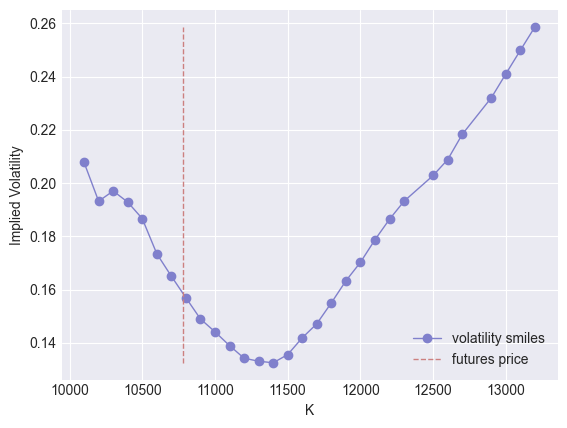

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2900\4218642920.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


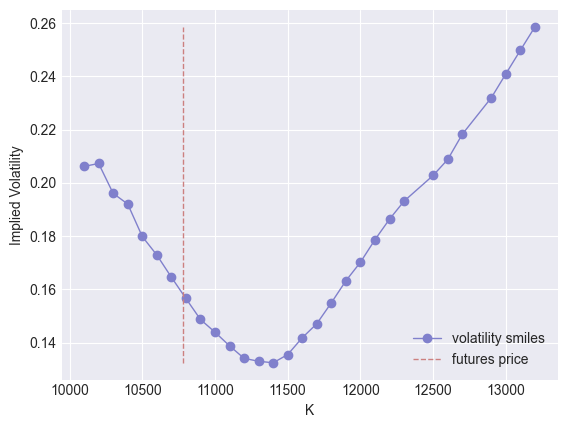

In [82]:
import matplotlib.pyplot as plt
upper_range = 800
lower_range = 800
K_nums_filter = np.zeros((len(dates), 2))
K_nums = np.zeros((len(dates), 2))
IV_K_days_closing = [[]] * len(dates)
IV_K_days_settlement = [[]] * len(dates)
for i in range(len(dates)):
    IV_K_day_closing = IV_call_closing[IV_call_closing[:,0] == dates[i]]
    day_closing = IV_K_day_closing[0,column_index_Futures[5]]
    K_upperbond = day_closing + upper_range 
    K_lowerbond = day_closing - lower_range
    IV_K_day_K, condition = Bondfilter(IV_K_day_closing[:,column_index_closing[1]], K_lowerbond, K_upperbond)
    IV_K_day_closing_new = IV_K_day_closing[condition]

    IV_K_day_settlement = IV_call_settlement[IV_call_settlement[:,0] == dates[i]]
    day_settlement = IV_K_day_settlement[0,column_index_Futures[5]]
    K_upperbond = day_settlement + upper_range
    K_lowerbond = day_settlement- lower_range
    IV_K_day_K, condition = Bondfilter(IV_K_day_settlement[:,column_index_settlement[1]], K_lowerbond, K_upperbond)
    IV_K_day_settlement_new = IV_K_day_settlement[condition]



    K_nums_filter[i,0] = len(IV_K_day_closing_new)
    K_nums_filter[i,1] = len(IV_K_day_settlement_new)
    IV_K_days_closing[i] = IV_K_day_closing[:,[column_index_closing[1], column_index_closing[6]]]#履約價  隱含波動率
    IV_K_days_settlement[i] = IV_K_day_settlement[:,[column_index_settlement[1], column_index_settlement[6]]]
K_max_filter = int(K_nums_filter.max())
k = 1436
x = IV_K_days_closing[k][:, 0]
y = IV_K_days_closing[k][:, 1]
Kmax = (IV_K_days_closing[k][:,1]).max()
Kmin = (IV_K_days_closing[k][:,1]).min()
#print(IV_K_days[14])
#print(K_nums.min())
plt.style.use('seaborn-darkgrid')
plt.plot(x, y, lw=1, ls='-', marker='o', c=[0.5, 0.5, 0.8], label='volatility smiles')
plt.plot([Udata[k, 5]]*2, [Kmin, Kmax], lw=1, ls='--', c=[0.8, 0.5, 0.5], label='futures price')
plt.xlabel('K')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()

x = IV_K_days_settlement[k][:, 0]
y = IV_K_days_settlement[k][:, 1]
Kmax = (IV_K_days_settlement[k][:,1]).max()
Kmin = (IV_K_days_settlement[k][:,1]).min()
#print(IV_K_days[14])
#print(K_nums.min())
plt.style.use('seaborn-darkgrid')
plt.plot(x, y, lw=1, ls='-', marker='o', c=[0.5, 0.5, 0.8], label='volatility smiles')
plt.plot([Udata[k, 6]]*2, [Kmin, Kmax], lw=1, ls='--', c=[0.8, 0.5, 0.5], label='futures price')
plt.xlabel('K')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2900\2357096598.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2900\2357096598.py:42: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


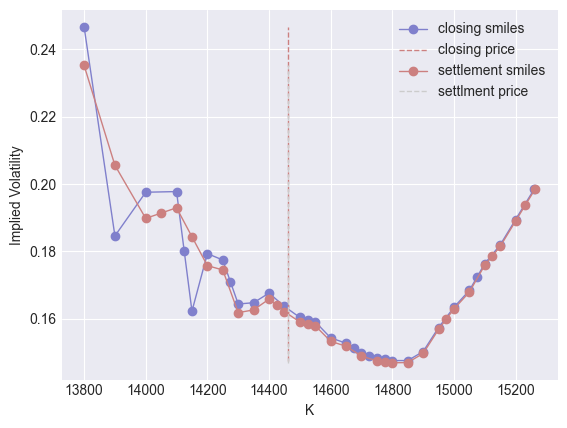

In [94]:
K_num_day = K_max_filter+2
IV_K_newMatrix = np.zeros((len(dates), K_num_day , 4))
upper_range = 800
lower_range = 800
for i in range(len(IV_K_days_closing)):
    Kday = IV_K_days_closing[i][:,0].astype(float)
    IVday = IV_K_days_closing[i][:,1].astype(float)
    day_closing = Udata[i, 5]
    K_upperbond = day_closing + upper_range 
    K_lowerbond = day_closing - lower_range
    new_K, new_IV = interpolate_range(x=Kday, y=IVday, \
                points=[K_lowerbond, K_upperbond], points_num=K_num_day , keep=True, kind='linear')
    IV_K_newMatrix[i,:, :2] = np.vstack((new_K, new_IV)).T

    Kday = IV_K_days_settlement[i][:,0].astype(float)
    IVday = IV_K_days_settlement[i][:,1].astype(float)
    day_settlement = Udata[i, 6]
    K_upperbond = day_settlement + upper_range 
    K_lowerbond = day_settlement - lower_range
    new_K, new_IV = interpolate_range(x=Kday, y=IVday, \
                                      points=[K_lowerbond, K_upperbond], points_num=K_num_day )
    IV_K_newMatrix[i, :, 2:] = np.vstack((new_K, new_IV)).T


k = 2560
x = IV_K_newMatrix[k,:, 0]
y = IV_K_newMatrix[k,:, 1]
Kmax = y.max()
Kmin = y.min()
#print(IV_K_days[14])
#print(K_nums.min())
plt.style.use('seaborn-darkgrid')
plt.plot(x, y, lw=1, ls='-', marker='o', c=[0.5, 0.5, 0.8], label='closing smiles')
plt.plot([Udata[k,5]]*2, [Kmin, Kmax], lw=1, ls='--', c=[0.8, 0.5, 0.5], label='closing price')

x = IV_K_newMatrix[k,:, 2]
y = IV_K_newMatrix[k,:, 3]
Kmax = y.max()
Kmin = y.min()
#print(IV_K_days[14])
#print(K_nums.min())
plt.style.use('seaborn-darkgrid')
plt.plot(x, y, lw=1, ls='-', marker='o', c=[0.8, 0.5, 0.5], label='settlement smiles')
plt.plot([Udata[k,6]]*2, [Kmin, Kmax], lw=1, ls='--', c=[0.8, 0.8, 0.8], label='settlment price')
plt.xlabel('K')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()

In [95]:
InterpolateMatrix1 = np.reshape(np.array(['1','1']*(len(Udata)*K_num_day )), (-1,2))
InterpolateMatrix2 = np.zeros((len(Udata)*K_num_day , len(column_names_Futures)-2+4))
InterpolateMatrix = np.hstack((InterpolateMatrix1, InterpolateMatrix2))
for i in range(len(Udata)):
    InterpolateMatrix[i*K_num_day :(i+1)*K_num_day , :9] = Udata[i]
    InterpolateMatrix[i*K_num_day :(i+1)*K_num_day , 9:] = IV_K_newMatrix[i]
columns_all = column_names_Futures
columns_all.extend(['履約價(收盤價)', '隱含波動率(收盤價)', '履約價(結算價)', '隱含波動率(結算價)'])
InterpolateData = pd.DataFrame(data=InterpolateMatrix, columns=columns_all)
InterpolateData.to_csv('./../../../Data/learning/FilterInterp_800_keep.csv', encoding='Big5', index=False)

下面這段暫時應該不會用到，不太實用

In [37]:
column1 = IV_Data.columns.to_numpy()
column1 = column1[[0,1,3,6,7,8,9]] #['交易日期' '到期日期' '買賣權' '期貨成交量' '期貨結算價' '到期天數' '無風險利率']

IV_K_data = pd.DataFrame({'履約價/隱含波動率': list(IV_K_newMatrix)})
InterpolateData1 = pd.DataFrame(data=Udata, columns=column1)
InterpolateData1 =pd.concat((InterpolateData1, IV_K_data), axis=1)
InterpolateData1.to_csv('./../../Data/Organized/all/InterpolateData(call)1.csv', encoding='Big5', \
                       float_format='%.f', index=False)